<html lang="en" dir="ltr">
<heading>
  <h5>6.Assuming you know the current location of the bot and have a target location in space. Plan a straight line path 𝑝(𝑢) from start to end with P(0) = $P_1$ , P(1) = $P_2$ , v(0) = 0, v(1) = 0 ; u(t) ∈ [0, 1], P ∈ $R^3$ . Write a code for the same and plot position, velocity and acceleration vs time. Given this path, how will you control the bot? HINT: Use a cubic polynomial as a function of time, t, for u to satisfy all constraints. $u(t)=a_0t^3+a_1t^2+a_3t +a_4$</h5>
</heading>
<hr size="2" noshade="True">

<body>
  <p>
    The data given in the question seems insufficient. Necessary Assumptions has been made wherever required; thus the answer represents just a complete mathematical approach to solve the problem. It will be absolutely practical as the assumptions becomes suitable for real arena.
      <br>
      <br>
      Since our focus is on the specified straight line trajectory with the specified boundary conditions, we can just apply a nonlinear transformation to the current coordinate system (translation + rotation) such that $\vec{P_1}$ becomes our new
    origin & $\vec{P_2}$ - $\vec{P_1}$ lies on the XZ plane. Basically shift the origin to point $\vec{P_1}$ and rotate the coordinate system about Z axis such that $\vec{P_2}$ - $\vec{P_1}$ lies on the XZ plane.
    <br>
    Let’s say $\vec{P_0}$ = $\vec{P_2}$ - $\vec{P_1}$.
    <br>
    Now our problem statement becomes :
    <br>
    <center>
    Specified trajectory : P(u) ; u(t) ∈ [0, 1] ; P ∈ $R^3$
    <br>
    Boundary Conditions : P(0) = 0 ; P(1) = $P_0$ ; v(0) = 0 = v(1)
    <br>
    Parametric relation : $u(t) = a_0t^3+a_1t^2+a_3t +a_4$
    <br>
       </center>
    <br>
    Let's assume the total time taken to cover the specified trajectory is T.
    <br>
    Now we have :
    <br>
    $$ u(0) = a_4 = 0 $$
    <br>
    $$ u(T) = a_0T^3+a_1T^2+a_3T = 1 $$
    <br />
    Now
    <br>
    <center>
          $$ v(u) = \frac{dP(u)}{dt} = \frac{dP(u)}{du} \times \frac{du}{dt} = \frac{dP(u)}{du} \times ( 3a_0t^2+2a_1t+a_3) $$
    <br />      
    $$ v(0) = 0 $$
    <br>
    </center>
    Assuming $ 3a_0t^2+2a_1t+a_3 = 0$ at $t = 0 $ we obtain $$ a_3 = 0 $$
    <br>
    Now 
      <center>$ v(1) = 0 $. But $u(T) = 1 $
    <br>
    $$\implies 3a_0T^2+2a_1T+a_3 = 0 $$
    <br>
    $\implies a_0 = -\frac{2a_1}{3T} $
    </center>
    Now
      $$ a_0T^3+a_1T^2+a_3T = 1 $$
      $$ \implies (-\frac{2a_1}{3T})T^3+a_1T^2 = 1 $$
      $$ \implies a_1 = \frac{3}{T^2} $$
      $$ \implies a_0 = -\frac{2}{T^3} $$ 
      $$ \implies u(t) = -\frac{2}{T^3}t^3 + \frac{3}{T^2}t^2 $$
      <br>
      Assuming a strictly increasing linear bijective map between u & P, we have the following expression for P(u) : 
      <br>
      <center>
          $ P(u) = uP_0 $     $; u(t) ∈ [0, 1], P ∈ R^3 $
      </center>
      <br>
      The entire calculation changes as the assumptions change, but the mathematical approach & model remain the same; All assumptions made here are mathematically valid & completely satisfy all given parametric & boundary conditions, but it may not be practical.
      <br>
      For e.g. if we consider  $ P(u) = u^nP_0 $     $; u(t) ∈ [0, 1], P ∈ R^3, n ∈ N $, it also represent a valid solution subject to all parametric & boundary conditions. Also $ P(u) = sin(\frac{u*pi}{2})P_0 $ or $ P(u) = \frac{ln(1+u)}{ln2}P_0 $ satisfy all given conditions.
      <br>
    </p>
</body>
</html>


In [1]:
##  Concerned Variables

var('P','v','a','u','t')  # Sage Symbolic Variables

# Position P, Velocity v, accelaration a, parameter u, time t


(P, v, a, u, t)

In [2]:
##  User defined constant

var('P0','T')  # Sage Symbolic Variables

# Relative Position Vector P0, Total time of traversal T


(P0, T)

In [3]:
##  Function u --> P(u)

P(u) = u*P0  # Functional declaration
P  # Show the Function


u |--> P0*u

In [4]:
##  Function u --> Q(u) = dP/du

var('Q')  # Sage Symbolic Variable
Q(u) = derivative(P, u)  # 1st Order derivative dP/du
Q  # Show the Function


u |--> P0

In [5]:
##  Function t --> u(t)

u(t) = -2/T^3 * t^3 + 3/T^2 * t^2  # Functional declaration
u(t) = u(t).full_simplify()  # Simplify the expression
u  # Show the Function


t |--> (3*T*t^2 - 2*t^3)/T^3

In [6]:
##  Function t --> P(t)

P(t) = P(u(t))  # Change of functional input variable
P(t) = P(t).full_simplify()  # Simplify the expression
P  # Show the Function


t |--> (3*P0*T*t^2 - 2*P0*t^3)/T^3

In [7]:
##  Function t --> v(t)

v(t) = Q(u(t))*derivative(u, t)  # Evaluate the function
v(t) = v(t).full_simplify()  # Simplify the expression
v  # Show the Function


t |--> 6*(P0*T*t - P0*t^2)/T^3

In [8]:
##  Function t --> a(t)

a(t) = derivative(v,t)  # 1st Order derivative dv/dt
a(t) = a(t).full_simplify()  # Simplify the expression
a  # Show the Function


t |--> 6*(P0*T - 2*P0*t)/T^3

In [9]:
##  Boundary condition check on u
( u(t =0) , u(t =T))


(0, 1)

In [10]:
##  Boundary condition check on P
( P(t =0) , P(t =T))


(0, P0)

In [11]:
##  Boundary condition check on v
( v(t =0) , v(t =T))


(0, 0)

In [12]:
##  Obtain the required inputs

# Total Traversal time T
T0 = float(input("Value of T : "))

# Position P1
P1x = float(input("Value of X coordinate of P1 : "))  # X coordinate of P1
P1y = float(input("Value of Y coordinate of P1 : "))  # Y coordinate of P1 
P1z = float(input("Value of Z coordinate of P1 : "))  # z coordinate of P1

# Position P2
P2x = float(input("Value of X coordinate of P2 : "))  # X coordinate of P2
P2y = float(input("Value of Y coordinate of P2 : "))  # Y coordinate of P2
P2z = float(input("Value of Z coordinate of P2 : "))  # Z coordinate of P2

# Relative Position P0
p0 = sqrt( (P1x - P2x)^2 + (P1y - P2y)^2 + (P1z - P2z)^2 )  # Apply Euclidean Dist Formula
p0  # Show p0 value


Value of T : 10
Value of X coordinate of P1 : 0
Value of Y coordinate of P1 : 1
Value of Z coordinate of P1 : 2
Value of X coordinate of P2 : 1
Value of Y coordinate of P2 : 2
Value of Z coordinate of P2 : 3


1.7320508075688772

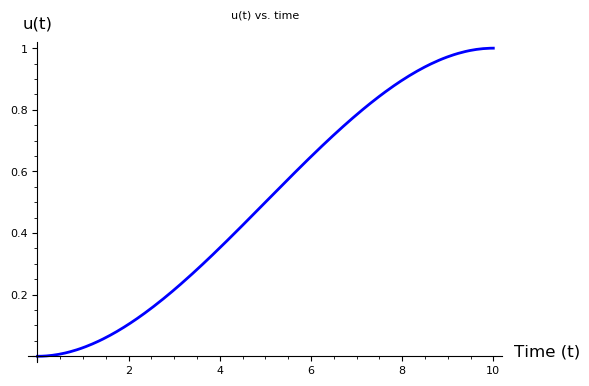

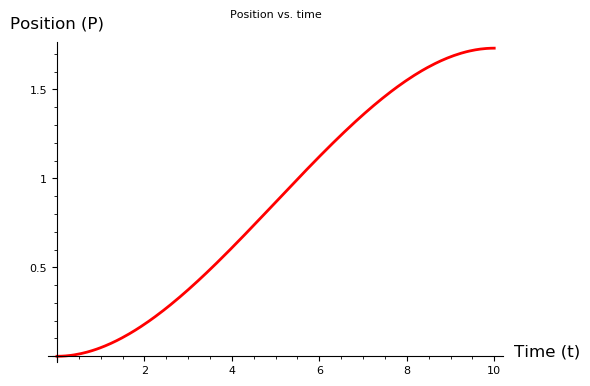

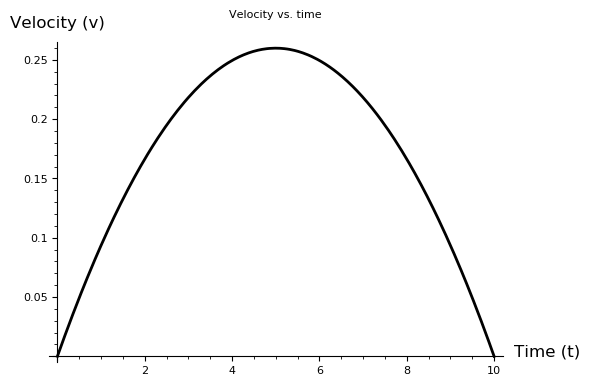

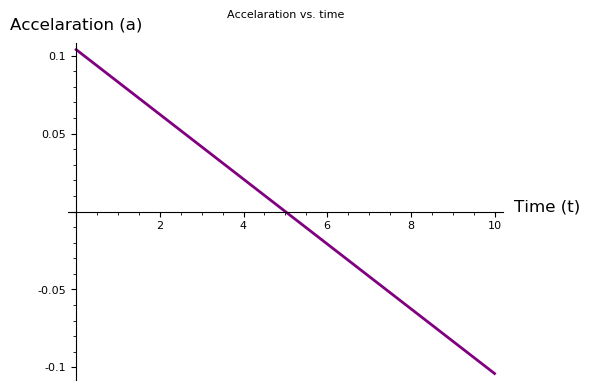

In [13]:
## Plot u(t), P(t) ,v(t) & a(t)

# Make required substitutes
U = u.subs(T = T0)  # Parameter u(t)
p = P.subs(P0 = p0, T = T0)  # Position
V = v.subs(P0 = p0, T = T0)  # Velocity
A = a.subs(P0 = p0, T = T0)  # Accelaration

# Declare the required plots
Plot_u = plot( U, (t ,0 ,T0), thickness = '2' ,color = 'blue' ,title = 'u(t) vs. time' ,axes_labels=['Time (t)','u(t)'] ,axes = True ,fontsize = 8 )  # u(t)
Plot_P = plot( p, (t ,0 ,T0), thickness = '2' ,color = 'red' ,title = 'Position vs. time' ,axes_labels=['Time (t)','Position (P)'] ,axes = True ,fontsize = 8 )  # Posiiton
Plot_v = plot( V, (t ,0 ,T0), thickness = '2' ,color = 'black' ,title = 'Velocity vs. time' ,axes_labels=['Time (t)','Velocity (v)'] ,axes = True ,fontsize = 8)  # Velocity
Plot_a = plot( A, (t ,0 ,T0), thickness = '2' ,color = 'purple' ,title = 'Accelaration vs. time' ,axes_labels=['Time (t)','Accelaration (a)'] ,axes = True ,fontsize = 8)  # Accelaration

# Show the Plots 
Plot_u.show()  # u(t)
Plot_P.show()  # Posititon
Plot_v.show()  # Velocity
Plot_a.show()  # Accelaration


<html lang="en" dir="ltr">
<heading>
  <h5>Control of the bot : </h5>
<hr size="2" noshade="True">

<body>
  <p>
    <center>
    <img src="https://raw.githubusercontent.com/Omegaconstant/Triphibian-Automation-App/main/Automation/6/Free-Body-Diagram.png" alt="Free Body Diagram">
    <h5>Free body Diagram</h5>
    </center>
    <br>    
    Now $T_h$ is the thrust Force & $\theta$ is the instantaneous roll angle.
    <br>
    Now Force equations :
        $$ T_hcos (\theta) - mg = m\ddot{z} $$
        $$ T_hsin (\theta) = m\ddot{x} $$
    Also :
        $$ M_y = I_y\ddot{\theta} $$
        $$ z = x tan (\alpha) $$
      
   Since we know angle $\alpha$ & P(t) ,& thus x(t) ,& we have 4 independent equations as shown above with 4 variables $T_h$, $\theta$, $M_y$ & z; we can calculate all as function of time t. SInce we have already our motor mixing algorithm, which can command $T_h$ & $M_y$ wrt time independently, we can achieve the desired state via the given trajectory with given boundary conditions in an ideal environment by commanding the input signals for $T_h$ & $M_y$ accordingly. 
  </p>
</body>

</html>


In [14]:
##  Concerned Variables

var('Th','My','N','x','z','H','az','ax')  # Sage Symbolic Variables

# Thrust Th, Torque My, Roll Angle N, X coordiante x, Z coordiante z, Angle alpha H
# Accelaration along z axis az, accelaration along x axis ax


(Th, My, N, x, z, H, az, ax)

In [15]:
##  Obtain the required inputs

m = float(input("Value of mass : "))  # Numerical variable for Mass
Iy = float(input("Value of Iy : "))  # Numerical variable for Iy
g = float(input("Value of g : "))  # Numerical variable fo g


Value of mass : 1
Value of Iy : 5
Value of g : 9.80665


In [16]:
## Calculate Angle alpha

# Rho in cylindrical coordinate
r = sqrt( (P1x - P2x)^2 + (P1y - P2y)^2 )  # Calculate rho 

# Angle alpha
H = arccos( r/ p0)  # Calculate H
H  # Show H value


0.6154797086703871

In [17]:
## Instantenous z & xcoordinate

z(t) = P(t)*sin(H)  # Calculate z coordinate
x(t) = P(t)*cos(H)  # Calculate x coordinate

(z,x)  # Show t --> ( z(t) ,x(t) )


(t |--> 0.5773502691896256*(3*P0*T*t^2 - 2*P0*t^3)/T^3,
 t |--> 0.8164965809277261*(3*P0*T*t^2 - 2*P0*t^3)/T^3)

In [18]:
## Instantenous accelaration along z & x axes

az(t) = derivative(z,t,2)  # Calculate accelaration along z axis
ax(t) = derivative(x,t,2)  # Calculate accelaration along x axis

(az,ax)  # Show t --> ( az(t) ,ax(t) )


(t |--> 3.4641016151377535*(P0*T - 2*P0*t)/T^3,
 t |--> 4.898979485566357*(P0*T - 2*P0*t)/T^3)

In [19]:
## Thrust 

Th(t) = m*sqrt( (az +g )^2 + ax^2)  # t --> Th(t)
Th(t) = Th(t).simplify()  # Simplify the expression
Th  # Show the function


t |--> 1.0*sqrt(((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6)

In [20]:
## Roll angle θ / N

N(t) = arccos( m*( az +g) /Th )  # t --> N(t)
N(t) = N(t).simplify()  # Simplify the expression
N # Show the function


t |--> arccos((1.0*(3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)/sqrt(((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6))

In [21]:
## Torque My

My(t) = Iy*derivative(N,t,2)  # t --> My(t)
My(t) = My(t).simplify()  # Simplify the expression
My


t |--> (-1.25*(-13.85640646055101*P0*((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)/T^3 - 96.0*(P0*T - 2*P0*t)*P0/T^6)^2*(3*(3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 29.41995)/(((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6)^(5/2) - 34.64101615137753*P0*(-13.85640646055101*P0*((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)/T^3 - 96.0*(P0*T - 2*P0*t)*P0/T^6)/((((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6)^(3/2)*T^3) + 719.9999999999998*P0^2*((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)/((((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6)^(3/2)*T^6))/sqrt(-((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2/(((3.464101615137753*P0*T - 6.928203230275506*P0*t)/T^3 + 9.80665)^2 + 24.0*(P0*T - 2*P0*t)^2/T^6) + 1) - (1.25*(-13.85640646055101*P0*((3.464101615137

In [22]:
## Boundary Values of Thrust

Th0 = Th(0).subs(P0 = p0, T = T0)  # Th(0)
ThT = Th(T0).subs(P0 = p0, T = T0)  # Th(T) 

(Th0,ThT)  # Show (Th0 ,ThT )


(9.867014858735137, 9.747019350678439)

In [23]:
## Boundary Values of Roll Angle

N0 = N(0).subs(P0 = p0, T = T0)  # N(0)
NT = N(T0).subs(P0 = p0, T = T0)  # N(T) 

(N0,NT)  # Show (N0 ,NT )


(0.008599749859270743, 0.008705623996562538)

In [24]:
## Boundary Values of My

My0 = limit(My.subs(P0 = p0, T = T0),t = 0)  # My(0)
MyT = My(T0).subs(P0 = p0, T = T0)  # My(T) 

(My0,MyT)  # Show (My0 ,MyT )


(t |--> -2.1041411329715803e-05, 2.1300315424578522e-05)

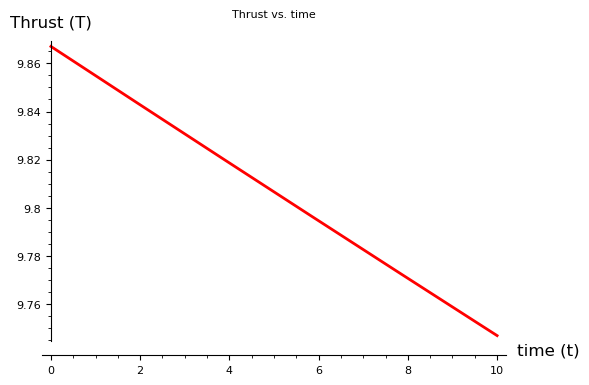

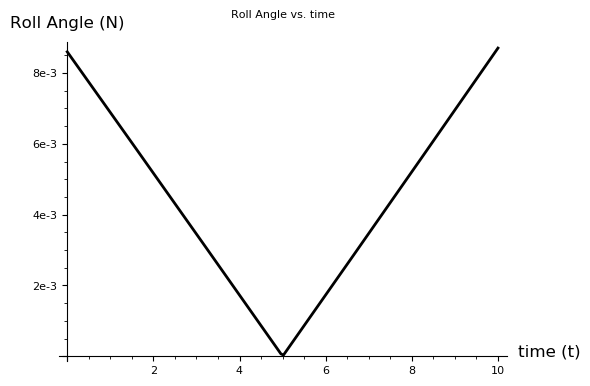

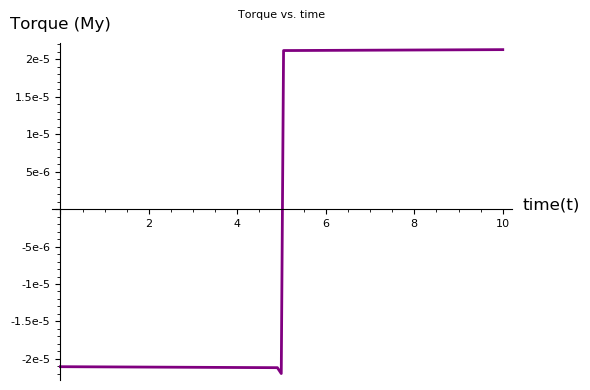

In [25]:
## Plot Th(t), N(t) & My(t)

# Make required substitutes
th = Th.subs(P0 = p0, T = T0)  # Th(t)
n = N.subs(P0 = p0, T = T0)  # N(t)
my = My.subs(P0 = p0, T = T0)  # My(t)

# Declare the required plots
Plot_Th = plot( th, (t ,0 ,T0), thickness = '2' ,color = 'red' ,title = 'Thrust vs. time' ,axes_labels=['time (t)','Thrust (T)'] ,axes = True ,fontsize = 8 )  # Thrust
Plot_N = plot( n, (t ,0 ,T0), thickness = '2' ,color = 'black' ,title = 'Roll Angle vs. time' ,axes_labels=['time (t)','Roll Angle (N)'] ,axes = True ,fontsize = 8)  # Roll Angle
Plot_My = plot( my, (t ,0 ,T0), thickness = '2' ,color = 'purple' ,title = 'Torque vs. time' ,axes_labels=['time(t)','Torque (My)'] ,axes = True ,fontsize = 8)  # Torque

# Show the Plots 
Plot_Th.show()  # Thrust
Plot_N.show()  # Roll Angle
Plot_My.show()  # Torque
